In [1]:
# Importing the required libraries
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [2]:
# Reading the csv file and putting it into 'df' object
df = pd.read_csv('_dataset/heart_v2.csv')
df.head()

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0


In [3]:
df.shape

(270, 5)

In [4]:
# Putting feature variable to X
X = df.drop('heart disease',axis=1)
# Putting response variable to y
y = df['heart disease']

In [5]:
# now lets split the data into train and test
from sklearn.model_selection import train_test_split

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
X_train.shape, X_test.shape

((189, 4), (81, 4))

In [6]:
from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5, n_estimators=100, oob_score=True)

In [7]:
%%time
classifier_rf.fit(X_train, y_train)

Wall time: 196 ms


RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [8]:
# checking the oob score
classifier_rf.oob_score_

0.656084656084656

In [9]:
# checking the model score
classifier_rf.score(X_test, y_test)

0.654320987654321

**Grid Search for Parameter Finetuning**

In [10]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [11]:
# Creating a dictionary of parameteres with their values being in lists
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

In [12]:
# Imporing GridSearch
from sklearn.model_selection import GridSearchCV

In [13]:
# Instantiating the grid search model
grid_search = GridSearchCV(estimator=rf, param_grid=params, cv = 4, n_jobs=-1, verbose=1, scoring="accuracy")

In [14]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits
Wall time: 32.3 s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [15]:
grid_search.best_score_

0.6985815602836879

In [16]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=5, min_samples_leaf=10, n_estimators=10,
                       n_jobs=-1, random_state=42)

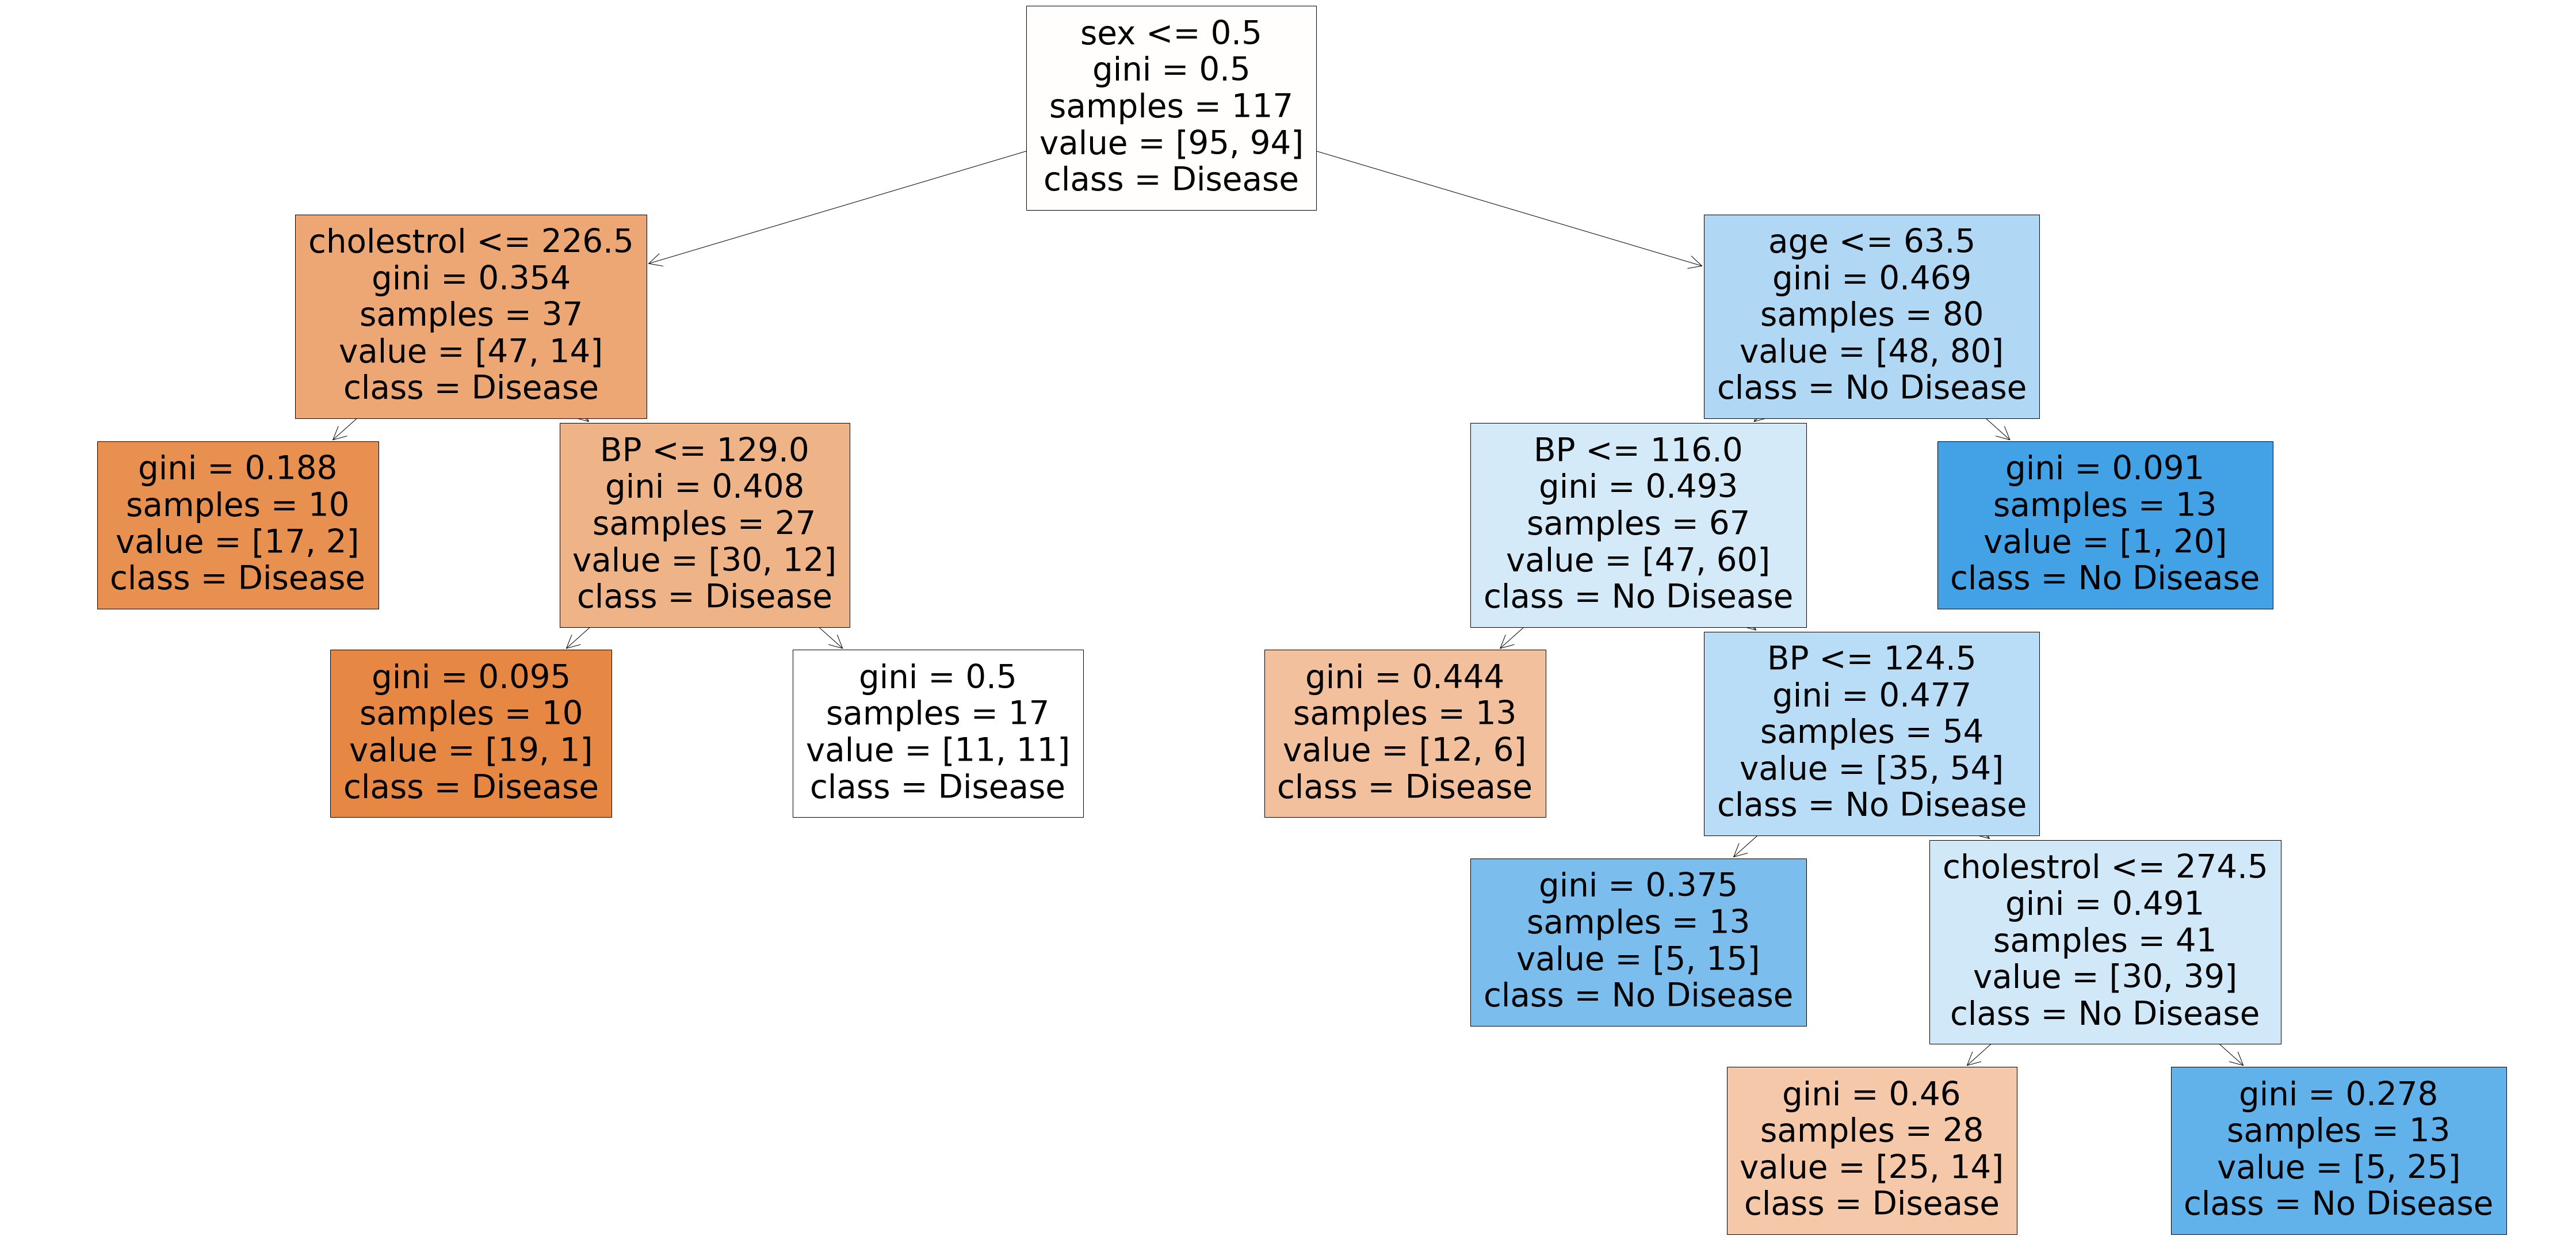

In [17]:
# Visualizing the decision tree with index 5 in the given random foresr

from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[9], feature_names = X.columns,class_names=['Disease', "No Disease"],filled=True);

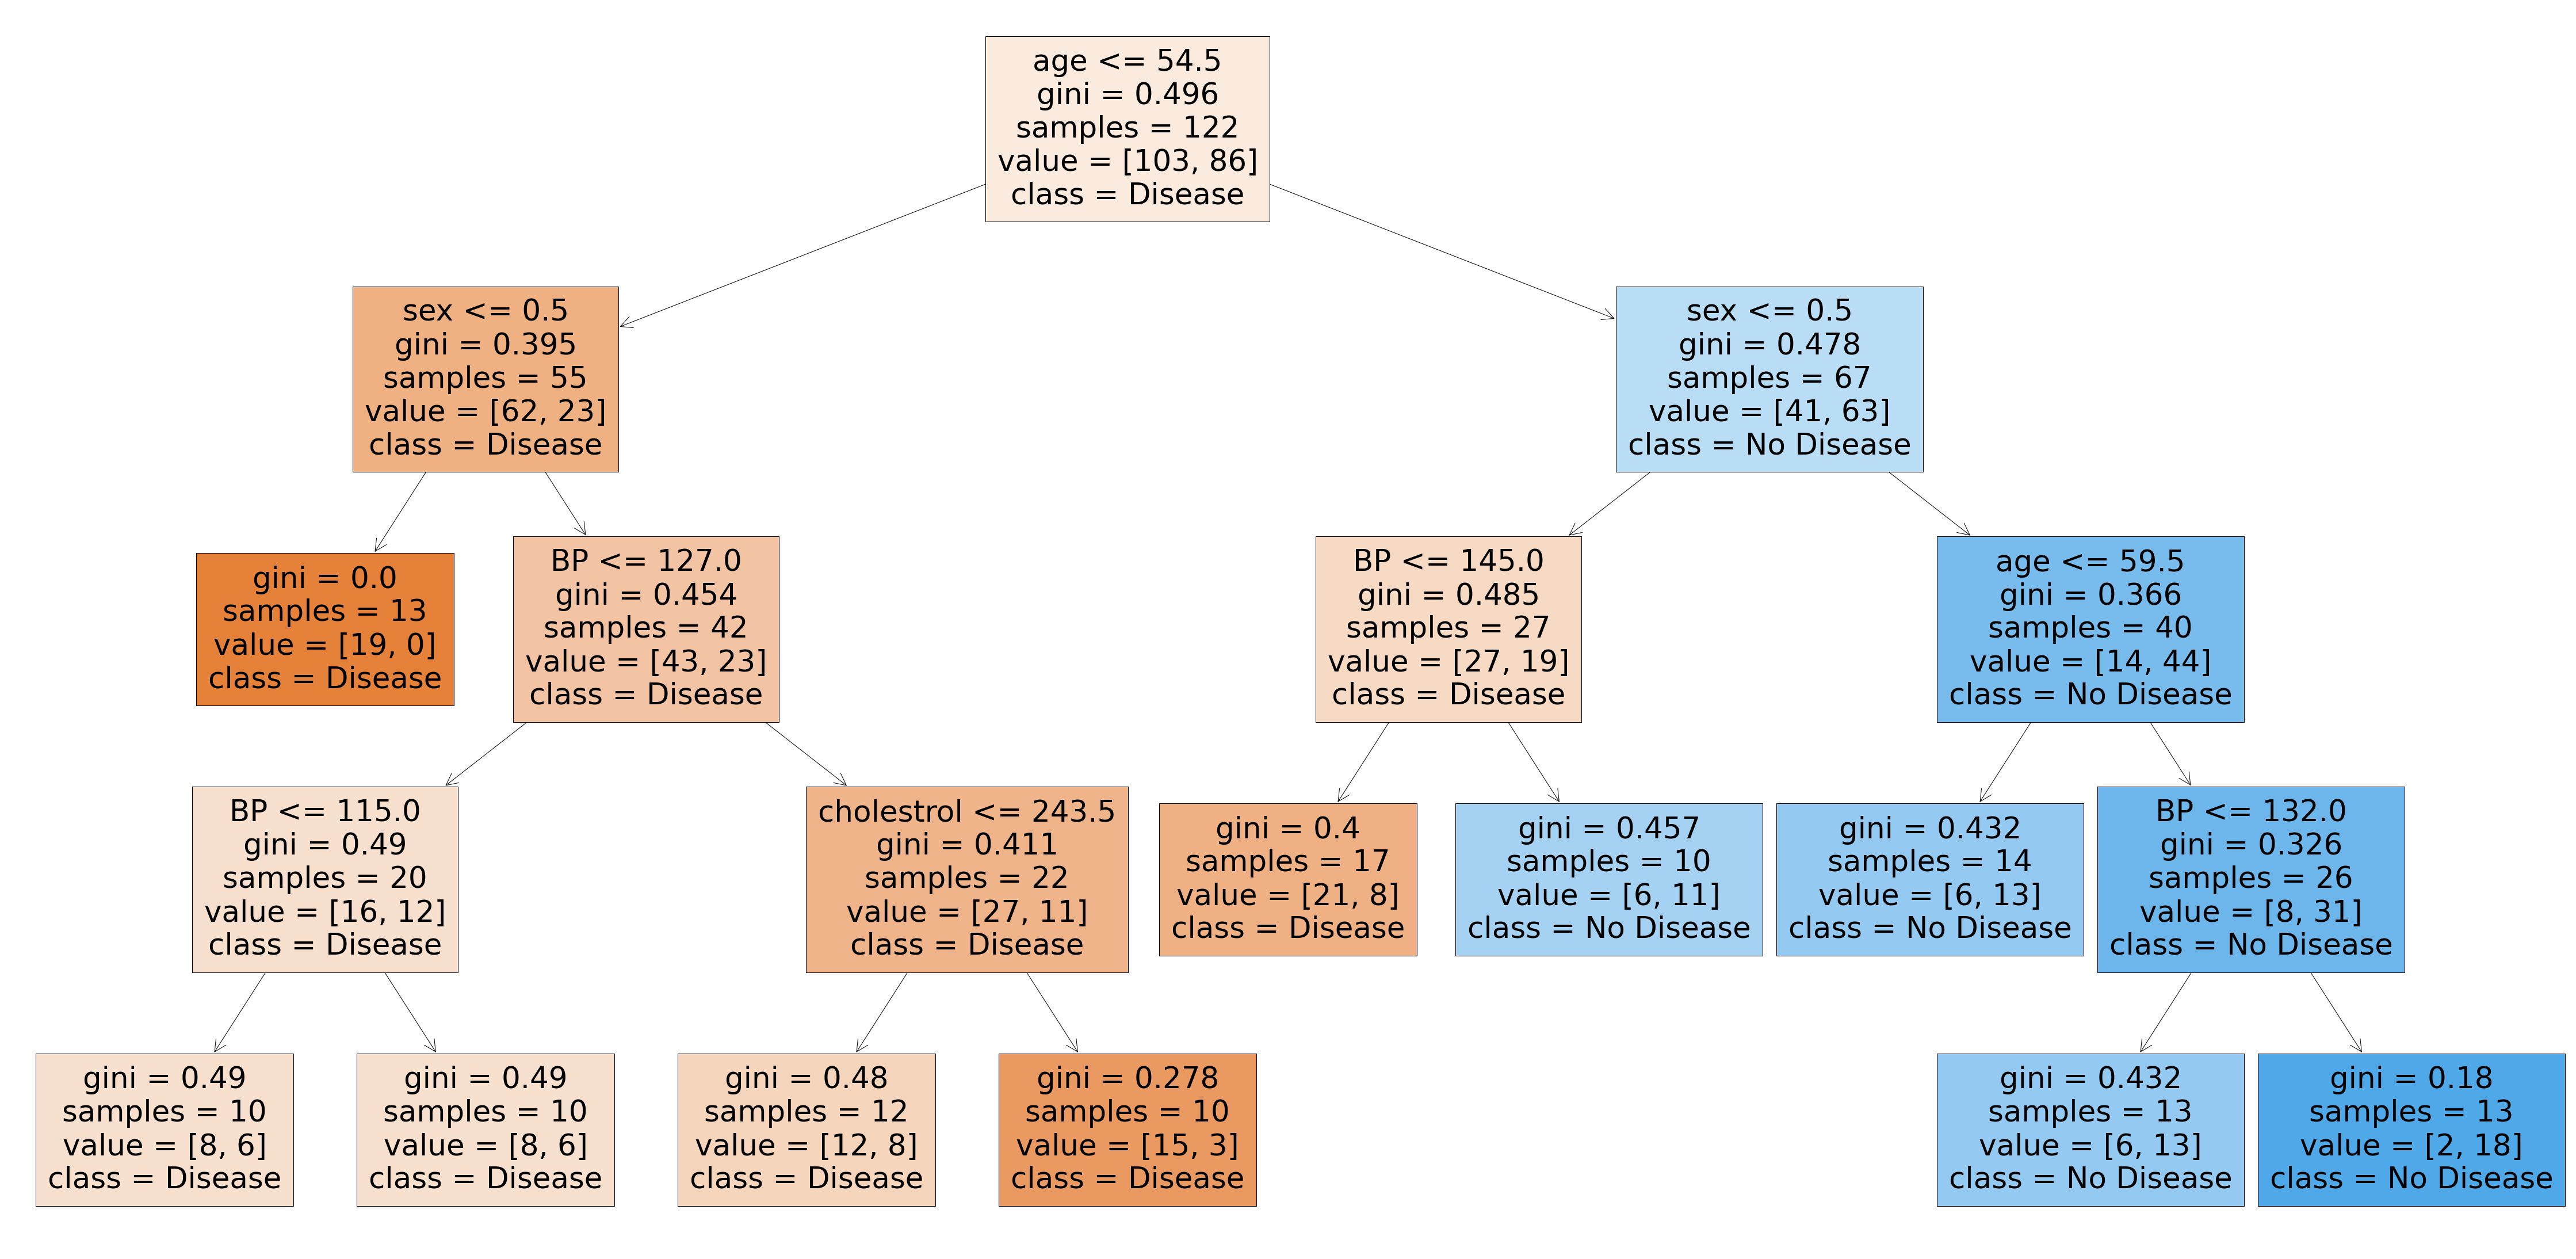

In [18]:
# Visualizing the decision tree with index 7 in the given random foresr

from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[7], feature_names = X.columns,class_names=['Disease', "No Disease"],filled=True);

In [19]:
# Finding the feature importance

rf_best.feature_importances_

array([0.46128487, 0.2180848 , 0.13174619, 0.18888413])

In [20]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_
})

In [21]:
imp_df.sort_values(by="Imp", ascending=False)


,Varname,Imp
0,age,0.461285
1,sex,0.218085
3,cholestrol,0.188884
2,BP,0.131746


**Random Search for Hyperparameter Finetuning**

In [22]:
from scipy.stats import randint

rs_space={'max_depth':list(np.arange(10, 100, step=10)) + [None],
              'n_estimators':np.arange(10, 500, step=50),
              'max_features':randint(1,7),
              'criterion':['gini','entropy'],
              'min_samples_leaf':randint(1,4),
              'min_samples_split':np.arange(2, 10, step=2)
         }

In [23]:
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestClassifier(random_state=42, n_jobs=-1)

rf_random = RandomizedSearchCV(rf, rs_space, n_iter=50, scoring='accuracy', n_jobs=-1, cv=4)

In [24]:
%%time 
model_random = rf_random.fit(X_train, y_train)

Wall time: 43.8 s


In [25]:
model_random.best_params_

{'criterion': 'gini',
 'max_depth': 60,
 'max_features': 2,
 'min_samples_leaf': 3,
 'min_samples_split': 4,
 'n_estimators': 410}

In [26]:
model_random.best_score_

0.6828457446808511

In [27]:
rf_best1 = model_random.best_estimator_
rf_best1

RandomForestClassifier(max_depth=60, max_features=2, min_samples_leaf=3,
                       min_samples_split=4, n_estimators=410, n_jobs=-1,
                       random_state=42)

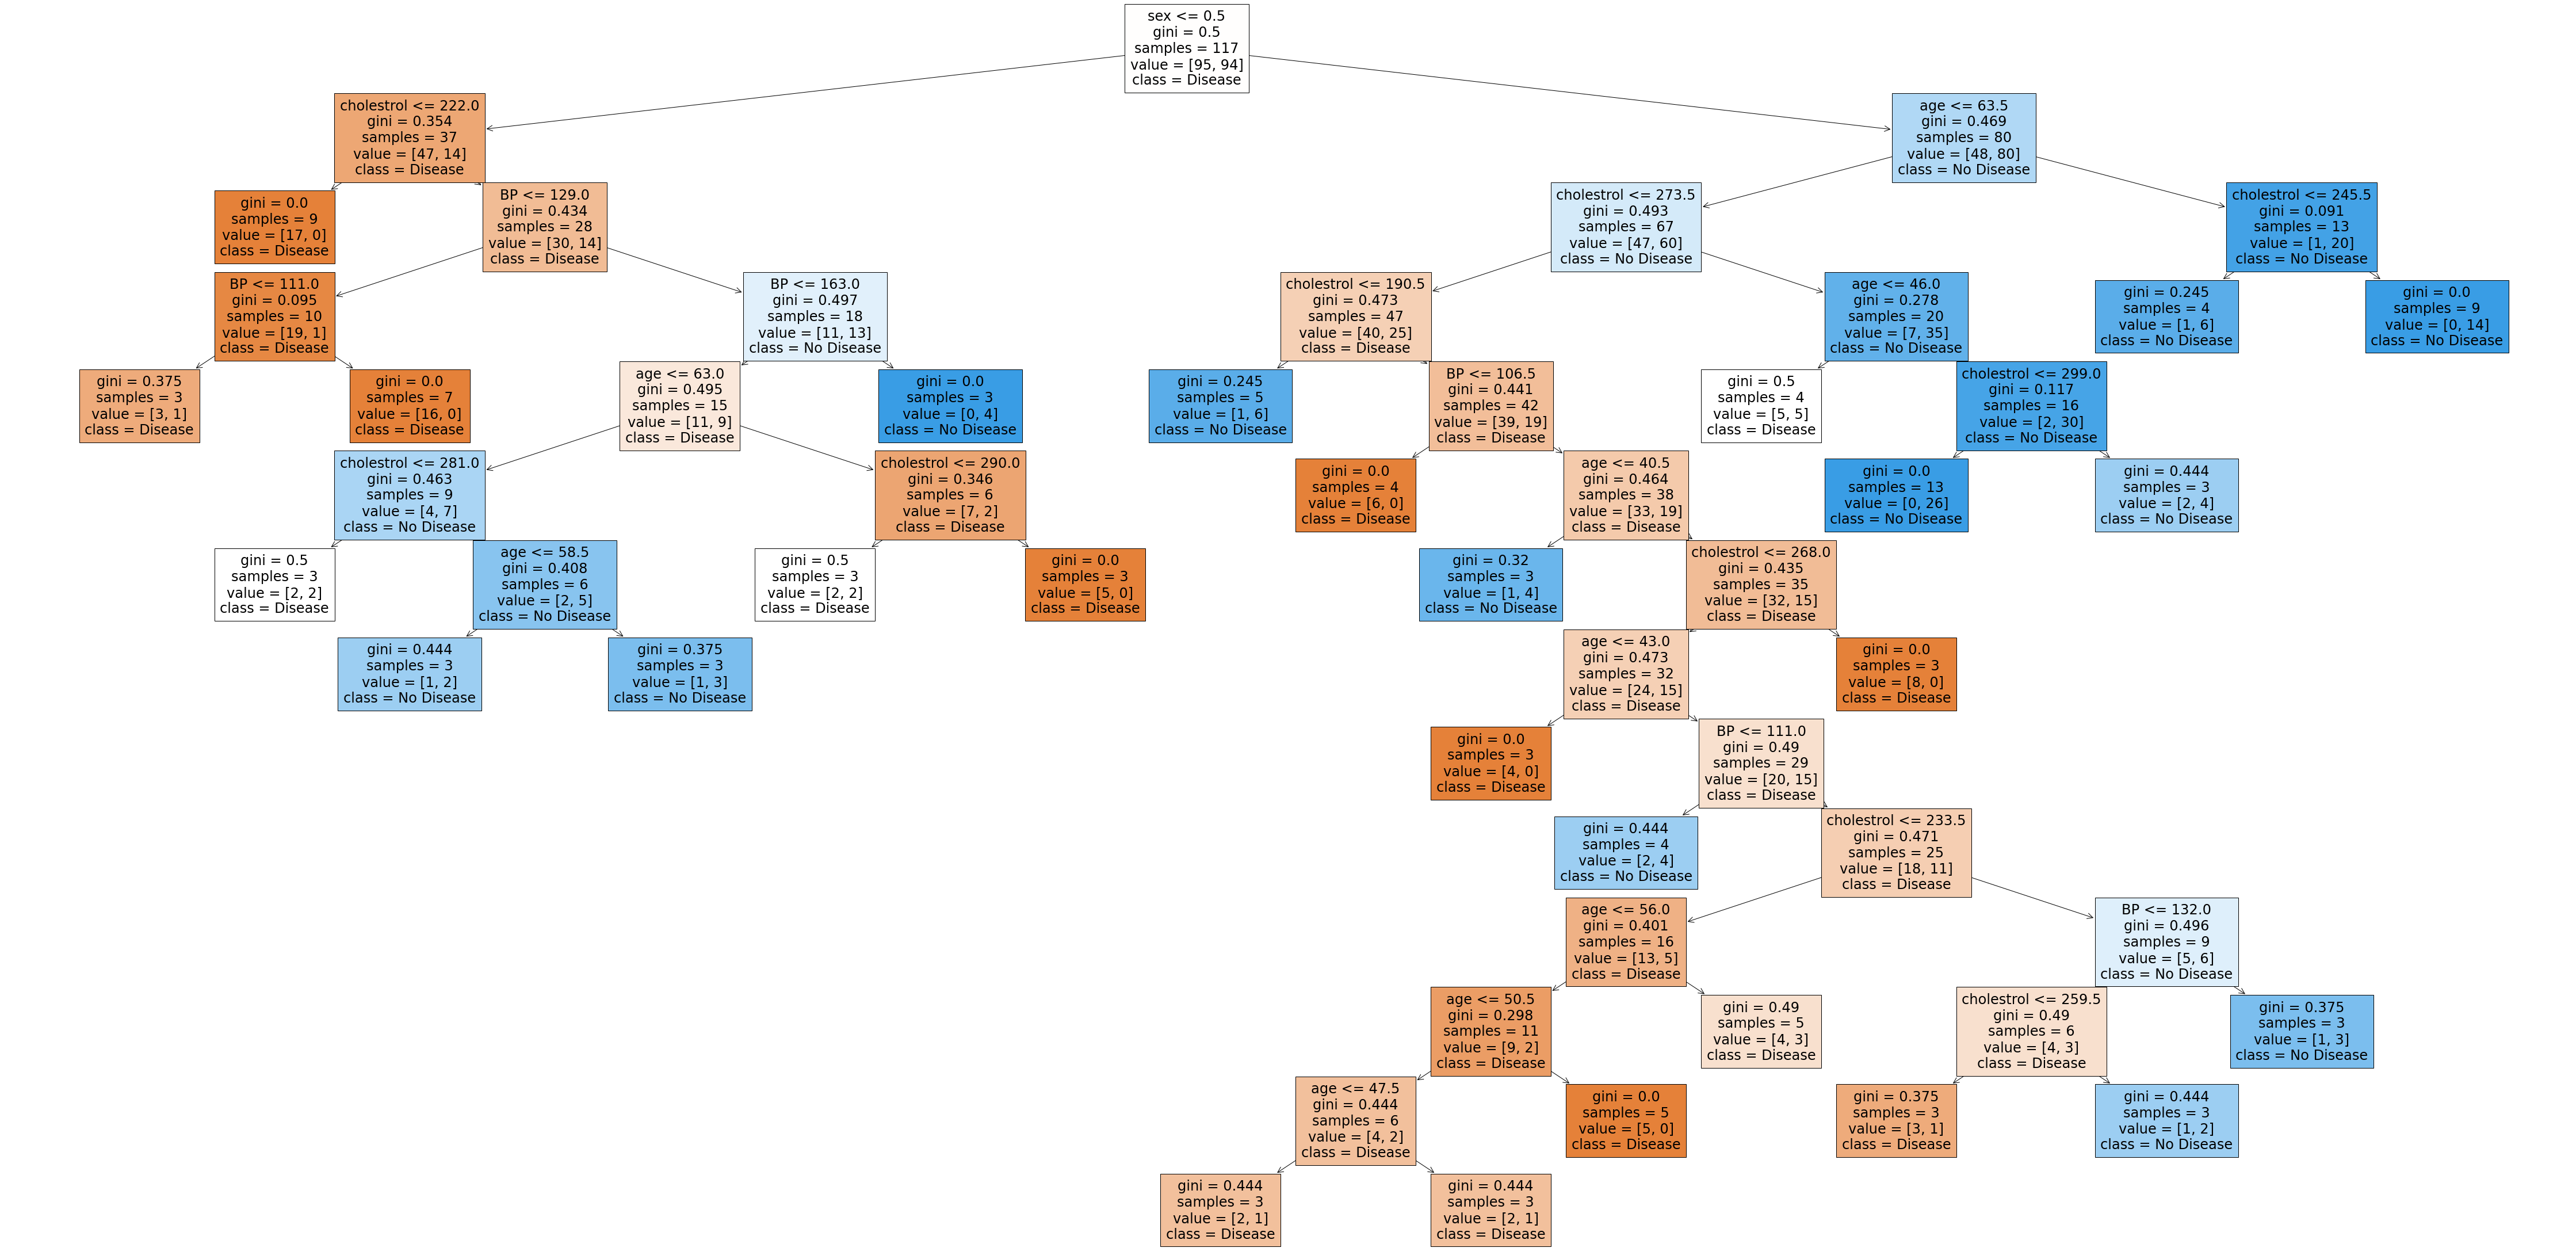

In [28]:
# Visualizing the decision tree with index 5 in the given random foresr

from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rf_best1.estimators_[9], feature_names = X.columns,class_names=['Disease', "No Disease"],filled=True);

**Normal RF Vs. GridSearch RF Vs. RandomSearch RF**

In [29]:
# Model (Model Picked through GridSearch) Validation

from sklearn.metrics import confusion_matrix

y_pred = rf_best.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
cm

array([[33, 16],
       [14, 18]], dtype=int64)

Text(69.0, 0.5, 'Truth')

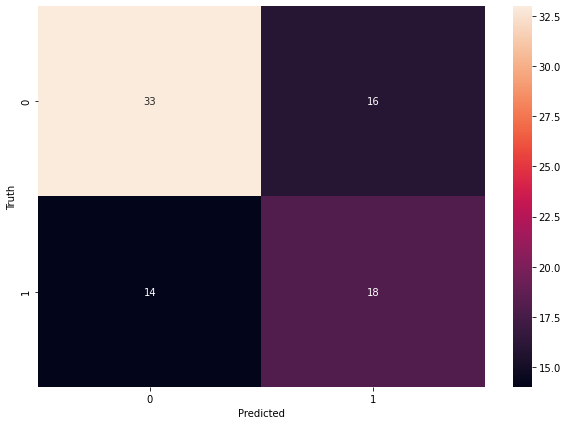

In [30]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [31]:
# Model (Model Picked through RandomSearch) Validation

from sklearn.metrics import confusion_matrix

y_pred1 = rf_best1.predict(X_test)

cm1 = confusion_matrix(y_test, y_pred)
cm1

array([[33, 16],
       [14, 18]], dtype=int64)

Text(69.0, 0.5, 'Truth')

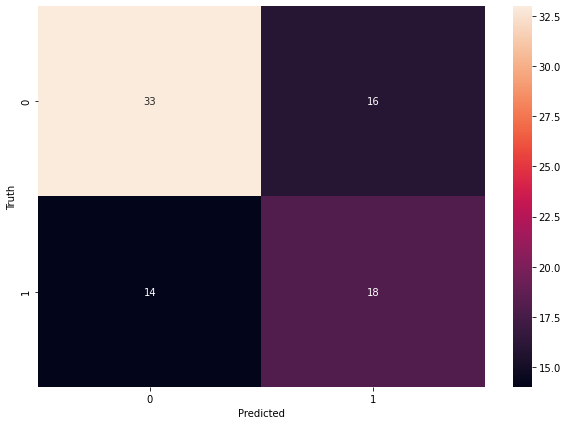

In [32]:
plt.figure(figsize=(10,7))
sns.heatmap(cm1, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [33]:
# Classification Report (Model Picked through GridSearch)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.67      0.69        49
           1       0.53      0.56      0.55        32

    accuracy                           0.63        81
   macro avg       0.62      0.62      0.62        81
weighted avg       0.63      0.63      0.63        81



In [34]:
# Classification Report (Model Picked through RandomSearch)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.71      0.76      0.73        49
           1       0.59      0.53      0.56        32

    accuracy                           0.67        81
   macro avg       0.65      0.64      0.65        81
weighted avg       0.66      0.67      0.66        81



In [35]:
# Model (Original Model) Validation

y_pred2 = classifier_rf.predict(X_test)

cm2 = confusion_matrix(y_test, y_pred2)
cm2

array([[36, 13],
       [15, 17]], dtype=int64)

Text(69.0, 0.5, 'Truth')

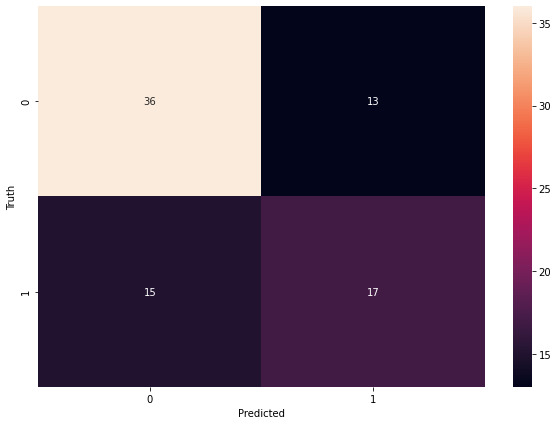

In [36]:
plt.figure(figsize=(10,7))
sns.heatmap(cm2, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

**Exercise:** Solve the classification problem for the Titanic toy dataset with Random Forest ensemble in the following fashion and report the best possible result. 
1. Train and test a baseline model with values for parameters to be default or something filled by you as standard ones.

2. Perform grid search to understand and find the best model.

3. Perform randome search to understand and find the best model.

4. Compare - Baseline Vs. GridSearch Model Vs. RandomSearch Model